In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization,SimpleRNN,GRU,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/BDA/tamil_sentiment")
df

,tamil_cleaned,label
0,வானி போஜன் ரசிகர்கள் சோலியைப் போல வாங்கிடா வெண...,1
1,நான் உன்னை விரும்புகிறேன் அஜித் நான் விரும்புக...,0
2,என்னாயா டிரெய்லர் கு முடி எல்லம் வேரா நிலை,0
3,விஜய் அண்ணா உர் மாஸ் தெர்ரி,0
4,நம்ப நடே நாசாமா,2
...,...,...
37700,,1
37701,நாடக காதல்இதை தான் இந்தவெள்ளாள பிள்ளைமார் சார்...,0
37702,சூப்பர் எஸ்கே,3
37703,குறைந்தபட்ச எம் வியா வரா வெப்போமா அனைத்து தாலா...,0


In [ ]:
# Tokenize and pad sequences
max_words = 5000  # Adjust based on your dataset
max_len = 100  # Adjust based on your dataset

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['tamil_cleaned'])
sequences = tokenizer.texts_to_sequences(df['tamil_cleaned'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post')

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['label'])

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

**RNN**

In [ ]:
# Build advanced RNN model with SimpleRNN layers
model1 = Sequential()
model1.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model1.add(SimpleRNN(64, return_sequences=True))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())

model1.add(SimpleRNN(32))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())

model1.add(Dense(4, activation='softmax'))  # Assuming 4 classes

In [ ]:
# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping1 = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
# Train the model with early stopping
history1=model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping1])

Epoch 1/50
943/943 [==============================] - 205s 211ms/step - loss: 1.2762 - accuracy: 0.5178 - val_loss: 1.1192 - val_accuracy: 0.5849
Epoch 2/50
943/943 [==============================] - 185s 196ms/step - loss: 1.0766 - accuracy: 0.5909 - val_loss: 1.0395 - val_accuracy: 0.5800
Epoch 3/50
943/943 [==============================] - 189s 200ms/step - loss: 1.0080 - accuracy: 0.5946 - val_loss: 1.0121 - val_accuracy: 0.5938
Epoch 4/50
943/943 [==============================] - 187s 198ms/step - loss: 0.9663 - accuracy: 0.6024 - val_loss: 1.0349 - val_accuracy: 0.5914
Epoch 5/50
943/943 [==============================] - 187s 198ms/step - loss: 0.9346 - accuracy: 0.6189 - val_loss: 1.4822 - val_accuracy: 0.2665
Epoch 6/50
943/943 [==============================] - 188s 200ms/step - loss: 0.9470 - accuracy: 0.6132 - val_loss: 1.1150 - val_accuracy: 0.5955
Epoch 7/50
943/943 [==============================] - 185s 196ms/step - loss: 0.9143 - accuracy: 0.6250 - val_loss: 1.1099 -

In [ ]:
# Evaluate the model
accuracy1 = model1.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy1}')

236/236 [==============================] - 5s 19ms/step - loss: 1.1099 - accuracy: 0.5965
Test Accuracy: 0.5964726209640503


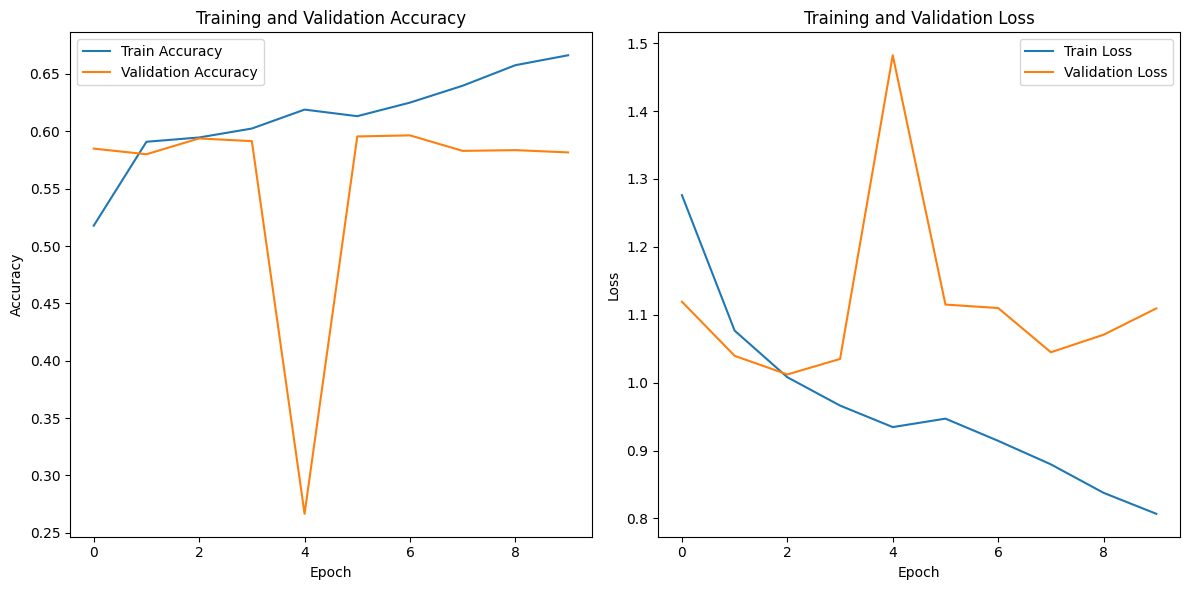

In [ ]:
#Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred1 = model1.predict(X_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)

# Decode the integer labels back to original labels
y_true_classes = y_test

236/236 [==============================] - 4s 17ms/step


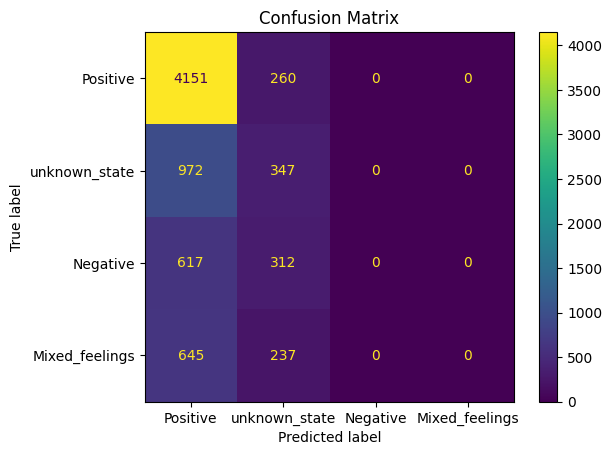

In [ ]:
# Generate confusion matrix
conf_matrix1 = confusion_matrix(y_true_classes, y_pred_classes1)

# Display confusion matrix using ConfusionMatrixDisplay
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1, display_labels=['Positive', 'unknown_state', 'Negative', 'Mixed_feelings'])
disp1.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
class_report1 = classification_report(y_true_classes, y_pred_classes1, target_names=['Positive', 'unknown_state', 'Negative', 'Mixed_feelings'])
print(class_report1)

                precision    recall  f1-score   support

      Positive       0.65      0.94      0.77      4411
 unknown_state       0.30      0.26      0.28      1319
      Negative       0.00      0.00      0.00       929
Mixed_feelings       0.00      0.00      0.00       882

      accuracy                           0.60      7541
     macro avg       0.24      0.30      0.26      7541
  weighted avg       0.43      0.60      0.50      7541



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


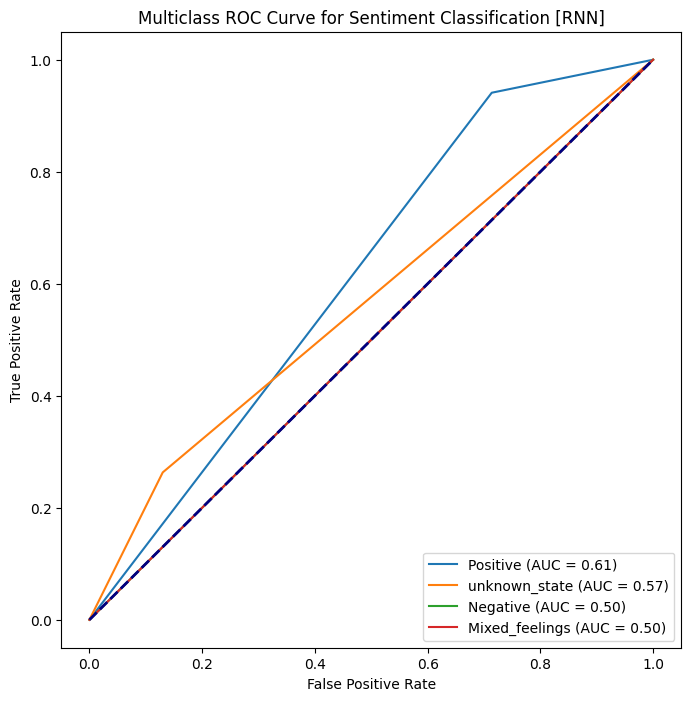

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have four labels
labels = ['Positive', 'unknown_state', 'Negative', 'Mixed_feelings']

# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_classes == i, y_pred_classes1 == i)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_classes == i, y_pred_classes1 == i)
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Sentiment Classification [RNN]')
plt.legend(loc='lower right')
plt.show()

**LSTM**

In [ ]:
# Build advanced RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
# Train the model with early stopping
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
943/943 [==============================] - 31s 26ms/step - loss: 1.2056 - accuracy: 0.5290 - val_loss: 1.0802 - val_accuracy: 0.5743
Epoch 2/50
943/943 [==============================] - 17s 18ms/step - loss: 1.0000 - accuracy: 0.6018 - val_loss: 0.9818 - val_accuracy: 0.6064
Epoch 3/50
943/943 [==============================] - 15s 16ms/step - loss: 0.9439 - accuracy: 0.6242 - val_loss: 0.9992 - val_accuracy: 0.6111
Epoch 4/50
943/943 [==============================] - 15s 16ms/step - loss: 0.9059 - accuracy: 0.6419 - val_loss: 0.9838 - val_accuracy: 0.6156
Epoch 5/50
943/943 [==============================] - 15s 16ms/step - loss: 0.8709 - accuracy: 0.6607 - val_loss: 0.9771 - val_accuracy: 0.6193
Epoch 6/50
943/943 [==============================] - 16s 17ms/step - loss: 0.8343 - accuracy: 0.6808 - val_loss: 0.9921 - val_accuracy: 0.6306
Epoch 7/50
943/943 [==============================] - 15s 16ms/step - loss: 0.8051 - accuracy: 0.6963 - val_loss: 0.9974 - val_accuracy:

In [ ]:
# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')

236/236 [==============================] - 1s 6ms/step - loss: 1.0625 - accuracy: 0.6376
Test Accuracy: 0.6375812292098999


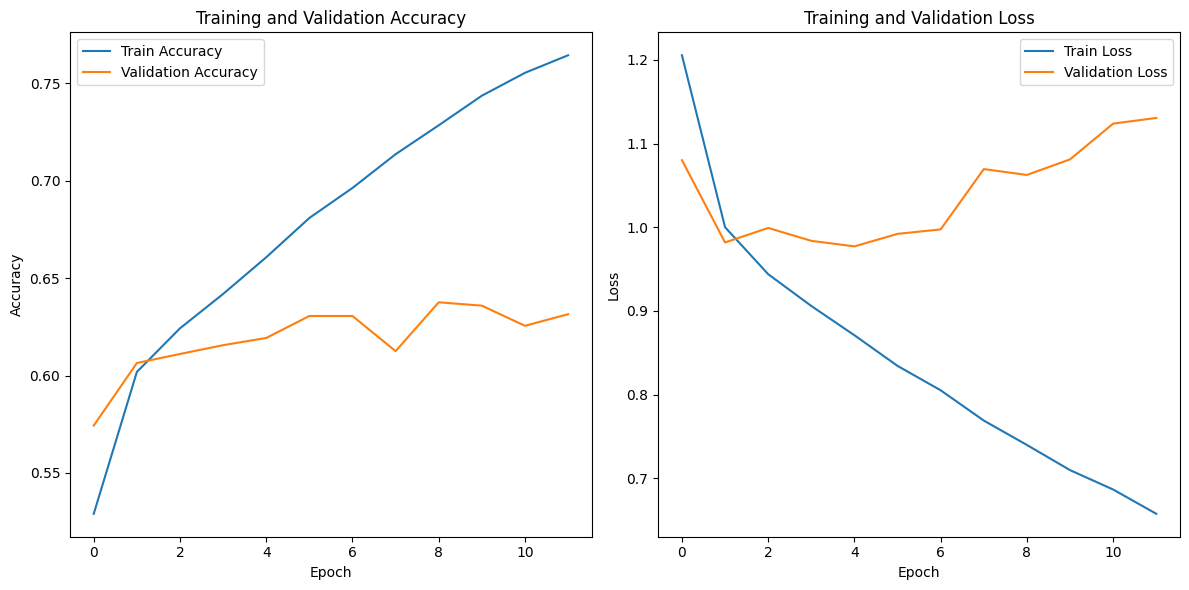

In [ ]:
#Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Decode the integer labels back to original labels
y_true_classes = y_test

236/236 [==============================] - 2s 6ms/step


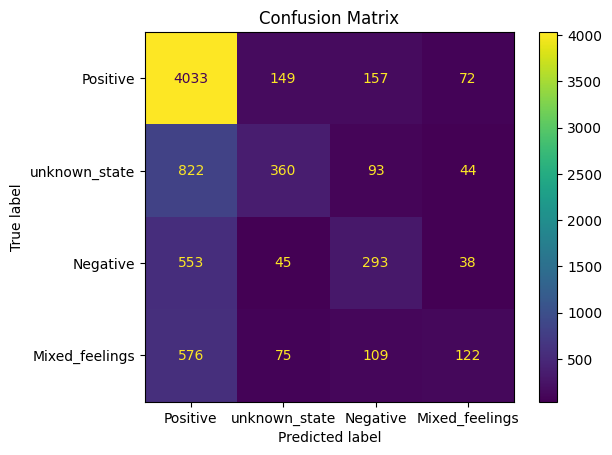

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Positive', 'unknown_state', 'Negative', 'Mixed_feelings'])
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=['Positive', 'unknown_state', 'Negative', 'Mixed_feelings'])
print(class_report)

                precision    recall  f1-score   support

      Positive       0.67      0.91      0.78      4411
 unknown_state       0.57      0.27      0.37      1319
      Negative       0.45      0.32      0.37       929
Mixed_feelings       0.44      0.14      0.21       882

      accuracy                           0.64      7541
     macro avg       0.53      0.41      0.43      7541
  weighted avg       0.60      0.64      0.59      7541



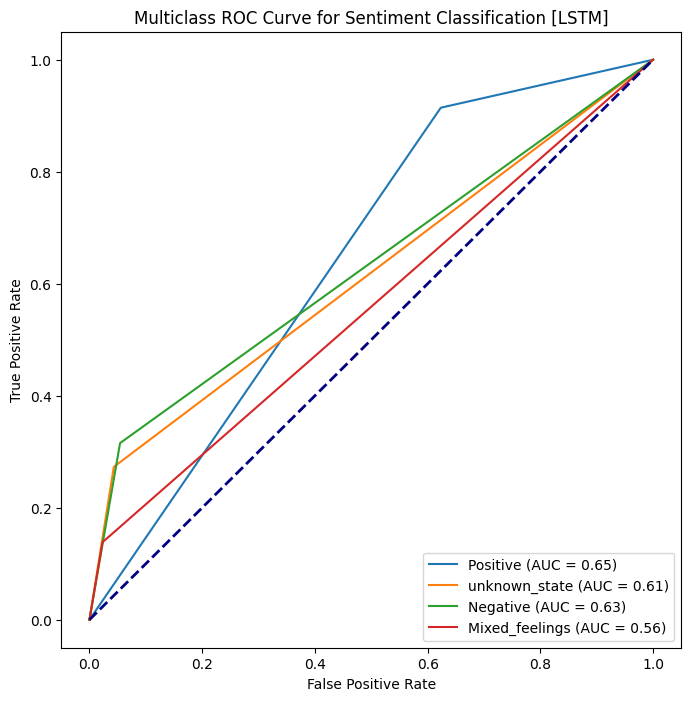

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have four labels
labels = ['Positive', 'unknown_state', 'Negative', 'Mixed_feelings']

# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_classes == i, y_pred_classes == i)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_classes == i, y_pred_classes == i)
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Sentiment Classification [LSTM]')
plt.legend(loc='lower right')
plt.show()

**BILSTM**

In [ ]:
# Define the advanced BiLSTM model
model4 = Sequential()
model4.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model4.add(Bidirectional(LSTM(64, return_sequences=True)))
model4.add(Dropout(0.5))
model4.add(BatchNormalization())

model4.add(Bidirectional(LSTM(32)))
model4.add(Dropout(0.5))
model4.add(BatchNormalization())

model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(BatchNormalization())

model4.add(Dense(4, activation='softmax'))  # Assuming 4 classes

In [ ]:
# Compile the model
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping4 = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
# Train the advanced BiLSTM model with early stopping
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping4])

Epoch 1/50
943/943 [==============================] - 42s 37ms/step - loss: 1.1926 - accuracy: 0.5253 - val_loss: 1.0305 - val_accuracy: 0.5993
Epoch 2/50
943/943 [==============================] - 25s 27ms/step - loss: 1.0054 - accuracy: 0.5931 - val_loss: 1.0054 - val_accuracy: 0.6064
Epoch 3/50
943/943 [==============================] - 25s 27ms/step - loss: 0.9559 - accuracy: 0.6113 - val_loss: 1.0217 - val_accuracy: 0.5851
Epoch 4/50
943/943 [==============================] - 24s 25ms/step - loss: 0.9100 - accuracy: 0.6396 - val_loss: 1.0104 - val_accuracy: 0.6249
Epoch 5/50
943/943 [==============================] - 23s 24ms/step - loss: 0.8677 - accuracy: 0.6624 - val_loss: 1.0266 - val_accuracy: 0.5700
Epoch 6/50
943/943 [==============================] - 24s 26ms/step - loss: 0.8318 - accuracy: 0.6791 - val_loss: 0.9952 - val_accuracy: 0.6230
Epoch 7/50
943/943 [==============================] - 24s 25ms/step - loss: 0.7980 - accuracy: 0.6941 - val_loss: 1.0031 - val_accuracy:

In [ ]:
# Evaluate the model
accuracy4 = model4.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy4}')

236/236 [==============================] - 2s 9ms/step - loss: 1.0104 - accuracy: 0.6249
Test Accuracy: 0.6248508095741272


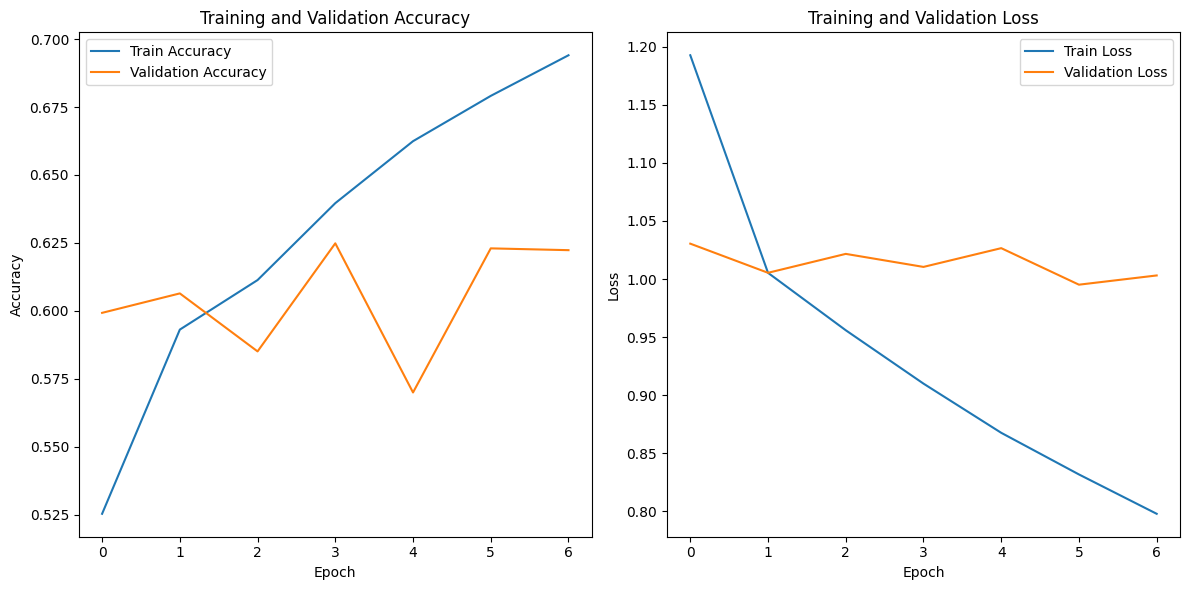

In [ ]:
#Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'], label='Train Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred4 = model4.predict(X_test)
y_pred_classes4 = np.argmax(y_pred4, axis=1)

# Decode the integer labels back to original labels
y_true_classes = y_test

236/236 [==============================] - 4s 10ms/step


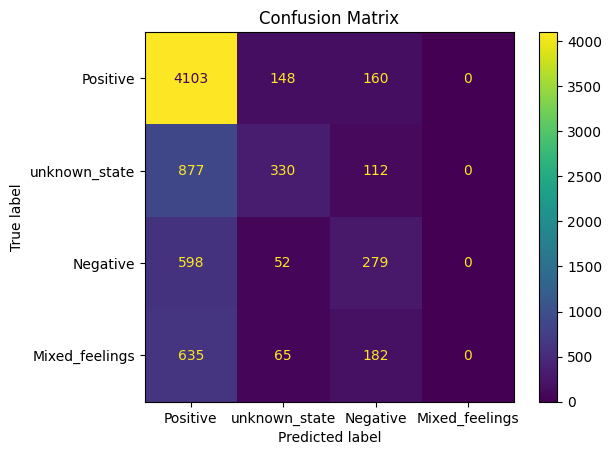

In [ ]:
# Generate confusion matrix
conf_matrix4 = confusion_matrix(y_true_classes, y_pred_classes4)

# Display confusion matrix using ConfusionMatrixDisplay
disp4 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix4, display_labels=['Positive', 'unknown_state', 'Negative', 'Mixed_feelings'])
disp4.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
class_report4 = classification_report(y_true_classes, y_pred_classes4, target_names=['Positive', 'unknown_state', 'Negative', 'Mixed_feelings'])
print(class_report4)

                precision    recall  f1-score   support

      Positive       0.66      0.93      0.77      4411
 unknown_state       0.55      0.25      0.34      1319
      Negative       0.38      0.30      0.34       929
Mixed_feelings       0.00      0.00      0.00       882

      accuracy                           0.62      7541
     macro avg       0.40      0.37      0.36      7541
  weighted avg       0.53      0.62      0.55      7541



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


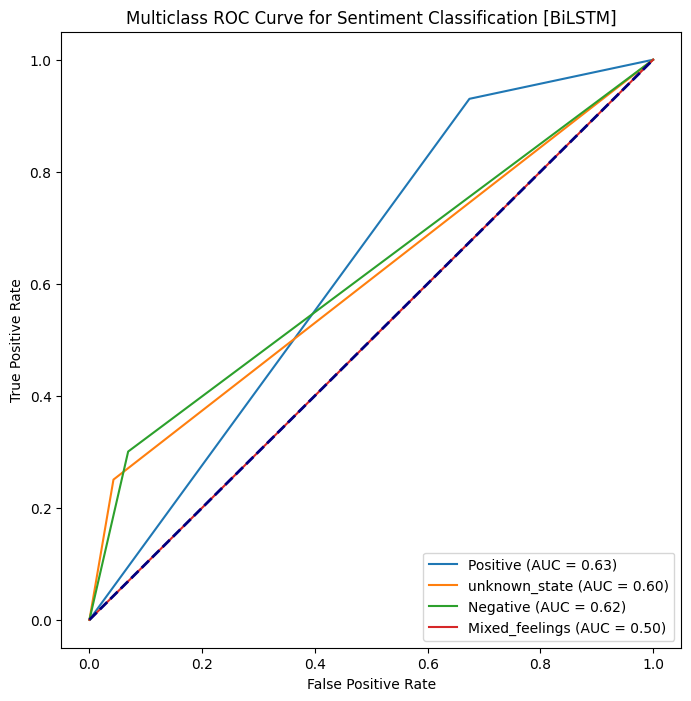

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have four labels
labels = ['Positive', 'unknown_state', 'Negative', 'Mixed_feelings']

# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_classes == i, y_pred_classes4 == i)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_classes == i, y_pred_classes4 == i)
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Sentiment Classification [BiLSTM]')
plt.legend(loc='lower right')
plt.show()

**GRU**

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model2.add(GRU(64, return_sequences=True))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())

model2.add(GRU(32))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())

model2.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping2 = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
# Train the advanced GRU model with early stopping
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping2])

Epoch 1/50
943/943 [==============================] - 30s 27ms/step - loss: 1.1895 - accuracy: 0.5286 - val_loss: 1.0102 - val_accuracy: 0.5955
Epoch 2/50
943/943 [==============================] - 15s 16ms/step - loss: 0.9929 - accuracy: 0.6049 - val_loss: 0.9906 - val_accuracy: 0.5963
Epoch 3/50
943/943 [==============================] - 15s 16ms/step - loss: 0.9412 - accuracy: 0.6274 - val_loss: 1.0514 - val_accuracy: 0.5441
Epoch 4/50
943/943 [==============================] - 15s 16ms/step - loss: 0.9050 - accuracy: 0.6448 - val_loss: 0.9758 - val_accuracy: 0.6215
Epoch 5/50
943/943 [==============================] - 15s 16ms/step - loss: 0.8705 - accuracy: 0.6610 - val_loss: 0.9743 - val_accuracy: 0.6062
Epoch 6/50
943/943 [==============================] - 15s 16ms/step - loss: 0.8375 - accuracy: 0.6768 - val_loss: 1.0116 - val_accuracy: 0.6145
Epoch 7/50
943/943 [==============================] - 15s 16ms/step - loss: 0.8081 - accuracy: 0.6914 - val_loss: 1.0157 - val_accuracy:

In [ ]:
# Evaluate the model
accuracy2 = model2.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy2}')

236/236 [==============================] - 1s 6ms/step - loss: 0.9758 - accuracy: 0.6215
Test Accuracy: 0.62153559923172


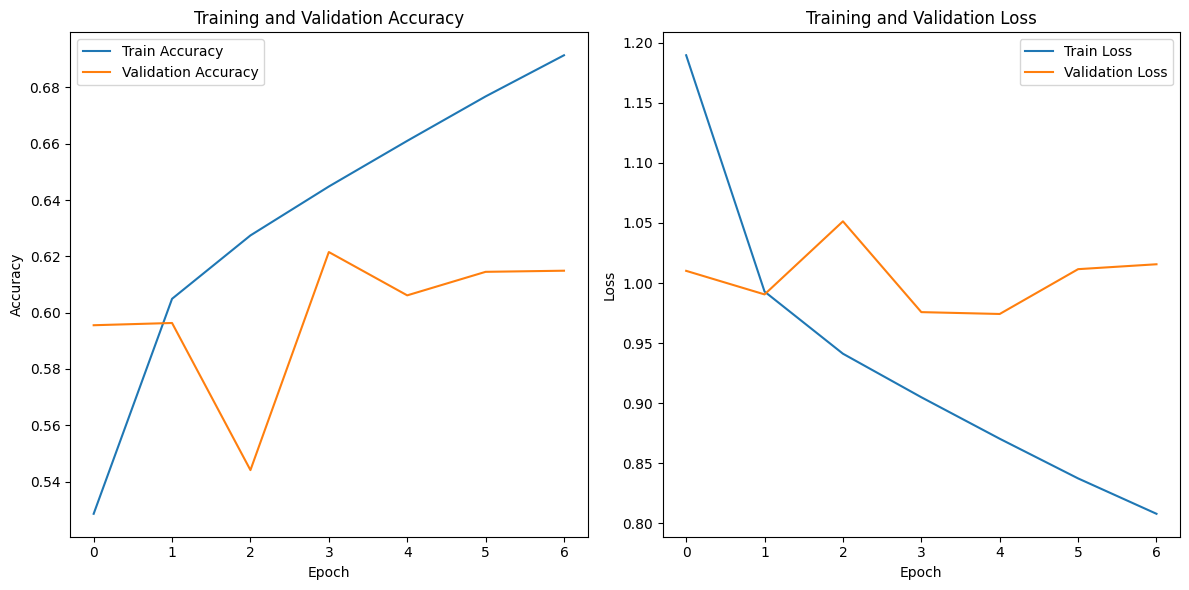

In [ ]:
#Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred2 = model2.predict(X_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)

# Decode the integer labels back to original labels
y_true_classes = y_test

236/236 [==============================] - 2s 5ms/step


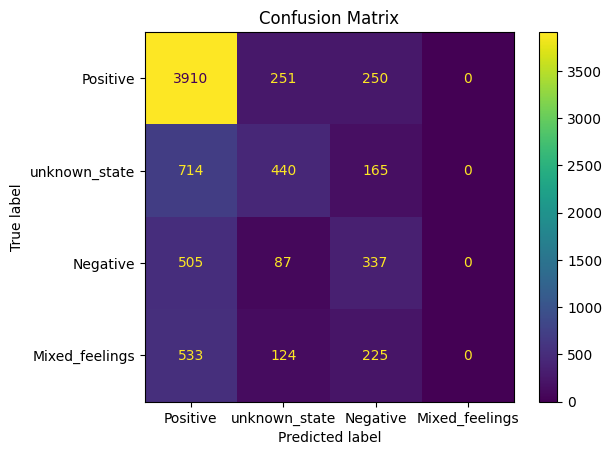

In [ ]:
# Generate confusion matrix
conf_matrix2 = confusion_matrix(y_true_classes, y_pred_classes2)

# Display confusion matrix using ConfusionMatrixDisplay
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2, display_labels=['Positive', 'unknown_state', 'Negative', 'Mixed_feelings'])
disp2.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
class_report2 = classification_report(y_true_classes, y_pred_classes2, target_names=['Positive', 'unknown_state', 'Negative', 'Mixed_feelings'])
print(class_report2)

                precision    recall  f1-score   support

      Positive       0.69      0.89      0.78      4411
 unknown_state       0.49      0.33      0.40      1319
      Negative       0.34      0.36      0.35       929
Mixed_feelings       0.00      0.00      0.00       882

      accuracy                           0.62      7541
     macro avg       0.38      0.40      0.38      7541
  weighted avg       0.53      0.62      0.57      7541



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


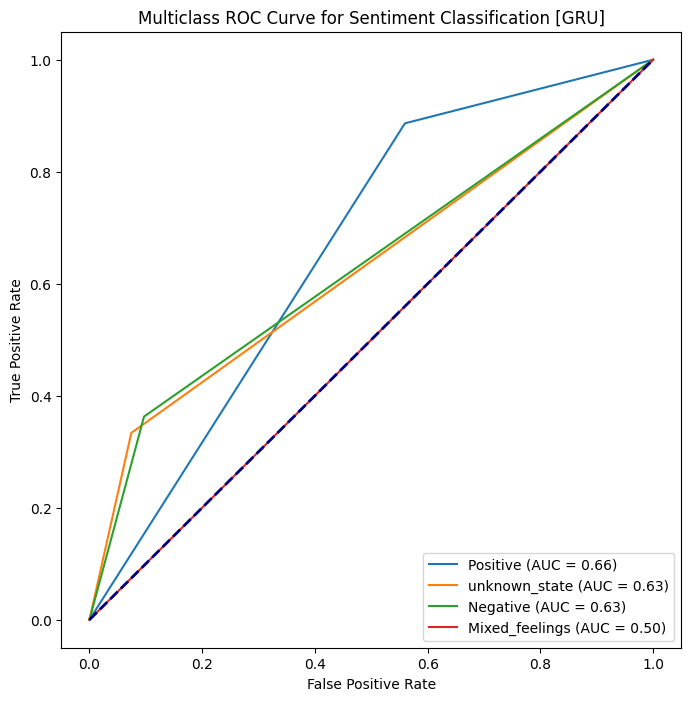

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have four labels
labels = ['Positive', 'unknown_state', 'Negative', 'Mixed_feelings']

# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_classes == i, y_pred_classes2 == i)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_classes == i, y_pred_classes2 == i)
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Sentiment Classification [GRU]')
plt.legend(loc='lower right')
plt.show()

**BIGRU**

In [ ]:
# Define the advanced BiGRU model
model3 = Sequential()
model3.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model3.add(Bidirectional(GRU(64, return_sequences=True)))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())

model3.add(Bidirectional(GRU(32)))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())

model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())

model3.add(Dense(4, activation='softmax'))  # Assuming 4 classes

In [ ]:
# Compile the model
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping3 = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
# Train the advanced BiGRU model with early stopping
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping3])

Epoch 1/50
943/943 [==============================] - 44s 38ms/step - loss: 1.1793 - accuracy: 0.5300 - val_loss: 1.0611 - val_accuracy: 0.5876
Epoch 2/50
943/943 [==============================] - 25s 27ms/step - loss: 0.9896 - accuracy: 0.6035 - val_loss: 0.9835 - val_accuracy: 0.6121
Epoch 3/50
943/943 [==============================] - 24s 25ms/step - loss: 0.9376 - accuracy: 0.6268 - val_loss: 1.0733 - val_accuracy: 0.5322
Epoch 4/50
943/943 [==============================] - 25s 27ms/step - loss: 0.8940 - accuracy: 0.6509 - val_loss: 1.0253 - val_accuracy: 0.5674
Epoch 5/50
943/943 [==============================] - 24s 26ms/step - loss: 0.8560 - accuracy: 0.6689 - val_loss: 0.9978 - val_accuracy: 0.6075


In [ ]:
# Evaluate the model
accuracy3 = model3.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy3}')

236/236 [==============================] - 2s 9ms/step - loss: 0.9835 - accuracy: 0.6121
Test Accuracy: 0.6121203899383545


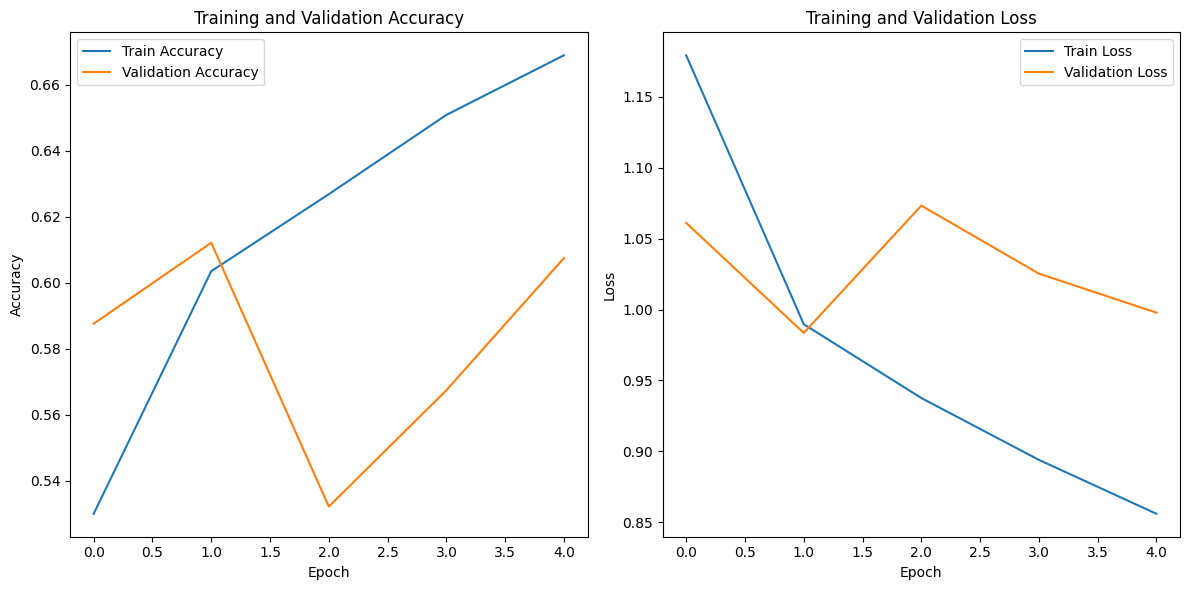

In [ ]:
#Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred3 = model3.predict(X_test)
y_pred_classes3 = np.argmax(y_pred3, axis=1)

# Decode the integer labels back to original labels
y_true_classes = y_test

236/236 [==============================] - 3s 10ms/step


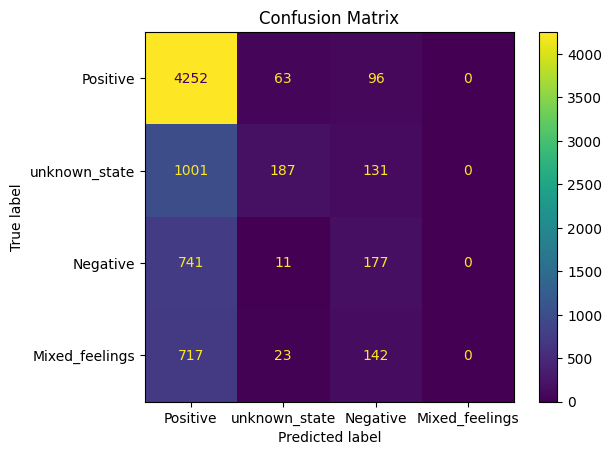

In [ ]:
# Generate confusion matrix
conf_matrix3 = confusion_matrix(y_true_classes, y_pred_classes3)

# Display confusion matrix using ConfusionMatrixDisplay
disp3 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix3, display_labels=['Positive', 'unknown_state', 'Negative', 'Mixed_feelings'])
disp3.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
class_report3 = classification_report(y_true_classes, y_pred_classes3, target_names=['Positive', 'unknown_state', 'Negative', 'Mixed_feelings'])
print(class_report3)

                precision    recall  f1-score   support

      Positive       0.63      0.96      0.76      4411
 unknown_state       0.66      0.14      0.23      1319
      Negative       0.32      0.19      0.24       929
Mixed_feelings       0.00      0.00      0.00       882

      accuracy                           0.61      7541
     macro avg       0.40      0.32      0.31      7541
  weighted avg       0.53      0.61      0.52      7541



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


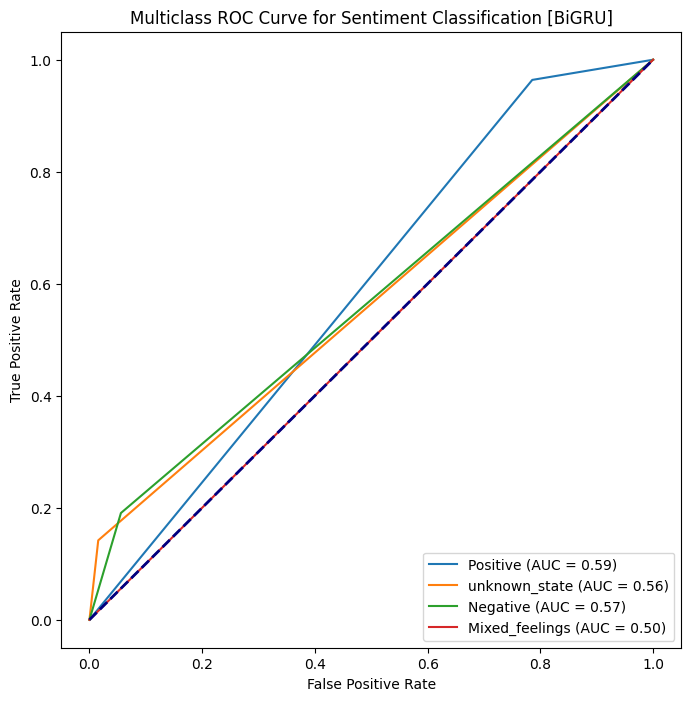

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have four labels
labels = ['Positive', 'unknown_state', 'Negative', 'Mixed_feelings']

# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_classes == i, y_pred_classes3 == i)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_classes == i, y_pred_classes3 == i)
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Sentiment Classification [BiGRU]')
plt.legend(loc='lower right')
plt.show()

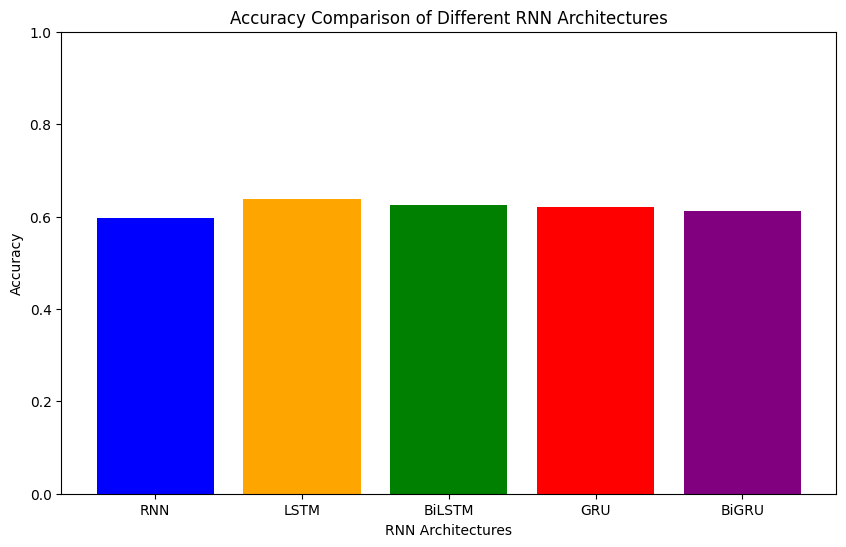

In [ ]:
# Model names
models = ['RNN', 'LSTM', 'BiLSTM', 'GRU', 'BiGRU']

# Accuracy values
accuracies = [accuracy1, accuracy, accuracy4, accuracy2, accuracy3]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('RNN Architectures')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different RNN Architectures')
plt.ylim(0, 1)  # Set the y-axis limit to better visualize differences
plt.show()
